In [1]:
! mkdir p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:01<00:00, 109MB/s]
100% 163M/163M [00:01<00:00, 112MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [4]:
!ls

data  face-mask-dataset.zip  p	sample_data


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[:5])
print(with_mask_files[-5:])
print(len(with_mask_files))
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[:5])
print(without_mask_files[-5:])
print(len(without_mask_files))

['with_mask_1898.jpg', 'with_mask_588.jpg', 'with_mask_1283.jpg', 'with_mask_3224.jpg', 'with_mask_2952.jpg']
['with_mask_1635.jpg', 'with_mask_3011.jpg', 'with_mask_1195.jpg', 'with_mask_3661.jpg', 'with_mask_685.jpg']
3725
['without_mask_3256.jpg', 'without_mask_221.jpg', 'without_mask_2517.jpg', 'without_mask_3434.jpg', 'without_mask_3488.jpg']
['without_mask_1696.jpg', 'without_mask_480.jpg', 'without_mask_3790.jpg', 'without_mask_2067.jpg', 'without_mask_3037.jpg']
3828


In [7]:
with_mask_labels=[1]*len(with_mask_files)
print(with_mask_labels[:5])
without_mask_labels=[0]*len(without_mask_files)
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [9]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


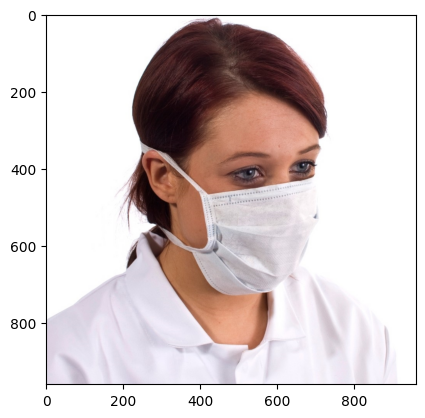

In [10]:
img = mgimg.imread("/content/data/with_mask/with_mask_3189.jpg")
imgplot = plt.imshow(img)
plt.show()

In [11]:
with_mask_path='/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image  =image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image  =image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
len(data)

7553

In [13]:
type(data)

list

In [14]:
import random

In [15]:
random.shuffle(data)

array([[[134, 132, 111],
        [110, 108,  88],
        [ 83,  80,  61],
        ...,
        [ 54,  54,  54],
        [ 52,  52,  52],
        [ 55,  55,  55]],

       [[100,  97,  78],
        [ 81,  78,  60],
        [ 61,  58,  41],
        ...,
        [ 51,  51,  51],
        [ 49,  49,  49],
        [ 50,  50,  50]],

       [[ 72,  69,  55],
        [ 62,  59,  45],
        [ 52,  48,  35],
        ...,
        [ 47,  47,  47],
        [ 46,  46,  46],
        [ 44,  44,  44]],

       ...,

       [[246, 240, 243],
        [242, 235, 237],
        [236, 228, 230],
        ...,
        [228, 160, 116],
        [224, 155, 113],
        [220, 151, 110]],

       [[253, 248, 253],
        [247, 241, 247],
        [239, 233, 238],
        ...,
        [228, 160, 117],
        [224, 155, 113],
        [219, 150, 109]],

       [[248, 245, 252],
        [247, 243, 250],
        [243, 238, 242],
        ...,
        [226, 158, 114],
        [221, 152, 110],
        [216, 147, 106]]], dtype=uint8)
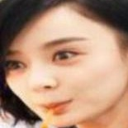

In [16]:
data[0]

In [17]:
X= np.array(data)
Y= np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7553, 128, 128, 3)
(7553,)
(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
X_train_scaled[7]

array([[[0.09803922, 0.15686275, 0.23137255],
        [0.09803922, 0.15686275, 0.23137255],
        [0.09803922, 0.15686275, 0.23137255],
        ...,
        [0.08627451, 0.15294118, 0.19215686],
        [0.0745098 , 0.14117647, 0.18039216],
        [0.06666667, 0.13333333, 0.17254902]],

       [[0.10588235, 0.16470588, 0.23921569],
        [0.10588235, 0.16470588, 0.23921569],
        [0.10196078, 0.16078431, 0.23529412],
        ...,
        [0.09411765, 0.14901961, 0.2       ],
        [0.07843137, 0.12941176, 0.18039216],
        [0.05882353, 0.11372549, 0.16862745]],

       [[0.10196078, 0.16078431, 0.24313725],
        [0.09803922, 0.15686275, 0.23529412],
        [0.10196078, 0.16078431, 0.23529412],
        ...,
        [0.09411765, 0.14117647, 0.20392157],
        [0.09019608, 0.13333333, 0.2       ],
        [0.08627451, 0.12941176, 0.19607843]],

       ...,

       [[0.21568627, 0.35294118, 0.43529412],
        [0.21960784, 0.36078431, 0.42745098],
        [0.23137255, 0

In [23]:
X_test_scaled[0]

array([[[0.94117647, 0.99215686, 1.        ],
        [0.94117647, 0.99215686, 1.        ],
        [0.94117647, 0.99215686, 1.        ],
        ...,
        [0.64705882, 0.64705882, 0.65490196],
        [0.58039216, 0.57647059, 0.54509804],
        [0.58431373, 0.57647059, 0.52156863]],

       [[0.94901961, 0.99215686, 1.        ],
        [0.94901961, 0.99215686, 1.        ],
        [0.94901961, 0.99215686, 1.        ],
        ...,
        [0.64313725, 0.64313725, 0.65098039],
        [0.57647059, 0.57254902, 0.54117647],
        [0.58431373, 0.57647059, 0.52156863]],

       [[0.95294118, 1.        , 1.        ],
        [0.95294118, 1.        , 1.        ],
        [0.95294118, 1.        , 1.        ],
        ...,
        [0.63921569, 0.63921569, 0.64705882],
        [0.57254902, 0.56862745, 0.5372549 ],
        [0.58039216, 0.57254902, 0.51764706]],

       ...,

       [[0.04705882, 0.06666667, 0.14509804],
        [0.01176471, 0.02745098, 0.10196078],
        [0.08235294, 0

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes = 2
model= keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [27]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.4952 - loss: 0.8072 - val_accuracy: 0.5140 - val_loss: 0.6930
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5038 - loss: 0.6925 - val_accuracy: 0.5157 - val_loss: 0.6916
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5128 - loss: 0.6933 - val_accuracy: 0.5207 - val_loss: 0.6917
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5446 - loss: 0.6883 - val_accuracy: 0.5124 - val_loss: 0.6942
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5571 - loss: 0.6708 - val_accuracy: 0.5223 - val_loss: 0.6929
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6138 - loss: 0.6397 - val_accuracy: 0.5008 - val_loss: 0.7210
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6673 - loss: 0.5921 - val_accuracy: 0.5041 - val_loss: 0.7237
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6961 - loss: 0.5552 - val_acc

In [28]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print(loss)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4975 - loss: 0.9242
0.9247658848762512
0.5036399960517883


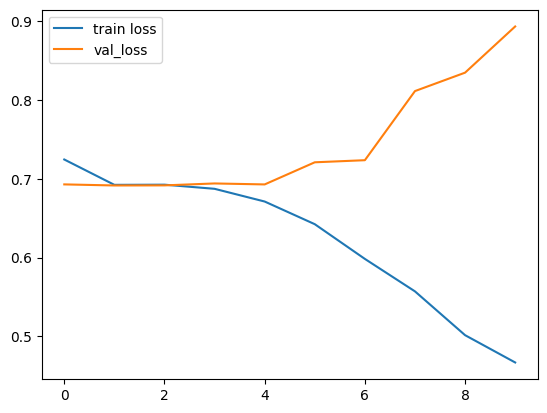

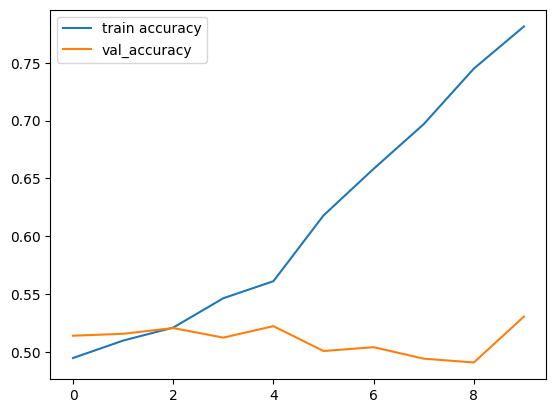

In [29]:
h= history
plt.plot(h.history['loss'],label ='train loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(h.history['accuracy'],label ='train accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()


path of the image to be predicted/content/withmask.jpeg


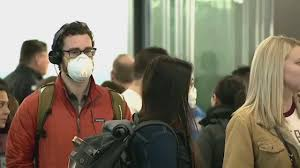

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
[[0.27560407 0.72559536]]
1
the person in the image is wearing mask


In [30]:
input_image_path = input('path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('the person in the image is wearing mask')

else:
  print('The person in the image not wearing a mask')

path of the image to be predicted/content/without.jpg


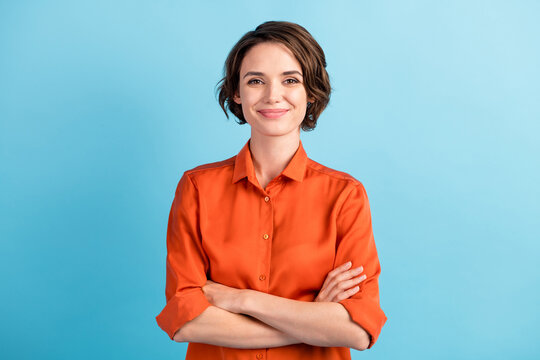

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.6063763 0.4066707]]
0
The person in the image not wearing a mask


In [31]:
input_image_path = input('path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print('the person in the image is wearing mask')

else:
  print('The person in the image not wearing a mask')